<a href="https://colab.research.google.com/github/pratikasarkar/Supervised-Learning---Classification/blob/master/Complete_Classification_Guide_By_Pratik_Asarkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

In [0]:
df = pd.DataFrame({'bmi' : [4.5,5.8,6.5,7.0,5.0,6.0,8.6],
                'glucose' :[190,220,280,320,200,250,380]})

In [176]:
df

,bmi,glucose
0,4.5,190
1,5.8,220
2,6.5,280
3,7.0,320
4,5.0,200
5,6.0,250
6,8.6,380


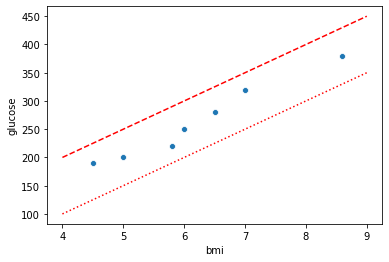

In [177]:
sns.scatterplot(df['bmi'],df['glucose'])
plt.plot([4,9],[200,450],color = 'r',linestyle = 'dashed')
plt.plot([4,9],[100,350],color = 'r',linestyle = 'dotted')

glucose = beta0 + beta1 * bmi

y -> actual points 

y' -> predicted points on the line

residual = y - y'

The difference between actual(y) and the predicted(y') is called a residual

For dashed line, all residuals will be negative.

For dotted line, all residuals will be positive.

beta1 = covariance of X and y divided by variance of X

beta1 = cov(X,y)/var(X)

cov(X,y) = sum_1_to_n((X-Xbar)(y-ybar))/n-1

var(X) = sum_1_to_n((X-Xbar)**2)/n-1

beta0 = ybar - beta1 * Xbar

In [0]:
n_bmi = len(df['bmi'])
n_glucose = len(df['glucose'])

In [0]:
cov_bmi_glu = np.sum((df['bmi'] - np.mean(df['bmi']))*(df['glucose'] - np.mean(df['glucose'])))/(n_bmi-1)

In [0]:
var_bmi = np.sum((df['bmi'] - np.mean(df['bmi']))**2)/(n_bmi-1)

In [0]:
beta1 = cov_bmi_glu/var_bmi

In [182]:
beta1

50.00000000000001

In [0]:
ybar = np.mean(df['glucose'])
Xbar = np.mean(df['bmi'])

In [0]:
beta0 = ybar - beta1 * Xbar

In [185]:
beta0

-47.142857142857224

In [0]:
glu_predict = beta0 + beta1 * df['bmi']

In [187]:
glu_predict

0    177.857143
1    242.857143
2    277.857143
3    302.857143
4    202.857143
5    252.857143
6    382.857143
Name: bmi, dtype: float64

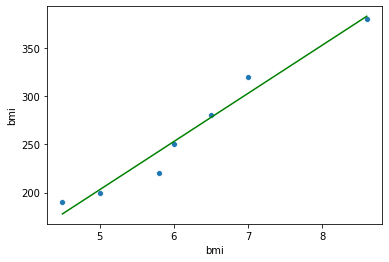

In [188]:
sns.scatterplot(df['bmi'],df['glucose'])
sns.lineplot(df['bmi'],glu_predict,color = 'g')

### Verification using the sklearn model

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [190]:
lr.fit(df[['bmi']],df['glucose'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
lr.coef_

array([50.])

In [192]:
lr.intercept_

-47.14285714285728

In [193]:
lr.predict(df[['bmi']])

array([177.85714286, 242.85714286, 277.85714286, 302.85714286,
       202.85714286, 252.85714286, 382.85714286])

For feature selection, correlation matrix will just give us how strongly the variables are correlated with each other, but the final decision whether to keep a variable or drop a variable should be taken by p-value in the ols summary.

For Regreesion model, we calculate the measures like rmse, r-squared and adjusted rsquared.

For binary classification, we calculate accuracy,confusion matrix,classification report and ROC AUC curve.

For multiclass classification, we calculate accuracy,confusion matrix,classification report and f1-score.

##### We will be working on differnt models for regression and classification, but we need to choose the best model for our clients. 

##### So for final performance validation, for regression we use RMSE.

##### For binary classification we use AUC and for multiclass classification we use F1-SCORE

# Adding a categorical value for y (dependent variable)

In [0]:
df['outcome'] = [0,0,1,1,0,0,1]

In [195]:
df

,bmi,glucose,outcome
0,4.5,190,0
1,5.8,220,0
2,6.5,280,1
3,7.0,320,1
4,5.0,200,0
5,6.0,250,0
6,8.6,380,1


In [0]:
n_outcome = len(df['outcome'])

In [0]:
cov_bmi_outcome = np.sum((df['bmi'] - np.mean(df['bmi']))*(df['outcome'] - np.mean(df['outcome'])))/(n_bmi-1)

In [0]:
beta1 = cov_bmi_outcome/var_bmi

In [199]:
beta1

0.3176043557168785

In [0]:
ybar = np.mean(df['outcome'])
Xbar = np.mean(df['bmi'])

In [0]:
beta0 = ybar - beta1 * Xbar

In [202]:
beta0

-1.540575576873218

In [0]:
outcome_predict = beta0 + beta1 * df['bmi']

In [204]:
outcome_predict

0   -0.111356
1    0.301530
2    0.523853
3    0.682655
4    0.047446
5    0.365051
6    1.190822
Name: bmi, dtype: float64

## ***Squashing / Sigmoid / Logistic function***

#### y = 1 / ( 1 + e^-(beta0 + beta1 * X) )

![alt text](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [205]:
outcome_pred_prob = 1/(1+ np.exp(-outcome_predict))
outcome_pred_prob

0    0.472190
1    0.574816
2    0.628048
3    0.664331
4    0.511859
5    0.590262
6    0.766888
Name: bmi, dtype: float64

In [206]:
outcome_pred = []
for val in outcome_pred_prob:
    if val > np.mean(outcome_pred_prob):
        outcome_pred.append(1)
    else:
        outcome_pred.append(0)
outcome_pred

[0, 0, 1, 1, 0, 0, 1]

In [207]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/US_Heart_Patients.csv')

In [209]:
df.shape

(4240, 16)

In [0]:
import statsmodels.api as sm

In [211]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [213]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
df2 = df.dropna()

In [215]:
df.shape[0] - df2.shape[0]

582

In [0]:
df2.rename(columns={'male':'Gender'},inplace=True)

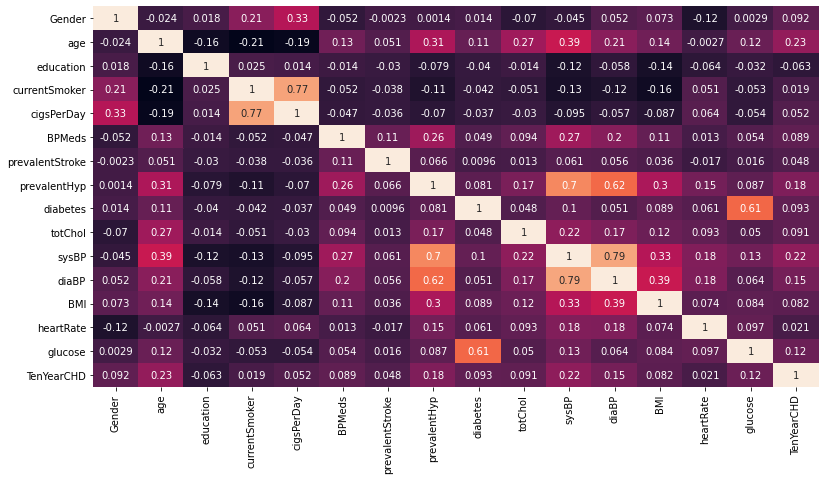

In [217]:
plt.figure(figsize=(13,7))
sns.heatmap(df2.corr(),annot = True,cbar=False)

In [0]:
X = df2.drop('TenYearCHD',axis=1)

In [219]:
X.shape

(3658, 15)

In [0]:
y = df2['TenYearCHD']

In [0]:
Xc = sm.add_constant(X)

In [222]:
model = sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.1175
Time:                        14:07:14   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
Gender              0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [0]:
def backward_elimination(df,target):
  X = df.drop(target,axis =1)
  Xc = sm.add_constant(X)
  remaining_cols = list(Xc.columns)
  y = df[target]
  while len(remaining_cols) > 0 : 
    X_temp = Xc[remaining_cols]
    model = sm.Logit(y,X_temp).fit()
    pvals = list(model.pvalues)
    max_pval = max(pvals)
    max_pval_feature = model.pvalues.idxmax()
    if max_pval > 0.03:
      remaining_cols.remove(max_pval_feature)
      print(max_pval_feature,max_pval)
    else:
      break
  return remaining_cols

In [224]:
impt_features = backward_elimination(df2,'TenYearCHD')

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
diabetes 0.9012045780435511
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
currentSmoker 0.64836503909236
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
BMI 0.6296050439469527
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
diaBP 0.5625804781393751
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
BPMeds 0.4697715086532108
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
heartRate 0.41602841295529747
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
education 0.3066346175601081
Optimization terminated successfully.
         Current function value: 0.376914
         Itera

In [225]:
impt_features

['const', 'Gender', 'age', 'cigsPerDay', 'sysBP', 'glucose']

In [226]:
model = sm.Logit(y,Xc[impt_features]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378192
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3652
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.1135
Time:                        14:07:14   Log-Likelihood:                -1383.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.041e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7081      0.421    -20.682      0.000      -9.533      -7.883
Gender         0.5312      0.106      5.032      0.000       0.324       0.738
age            0.0674      0.006     10.574      0.000       0.055       0.080
cigsPerDay     0.0195      0.004      4.683      0.000       0.011       0.028
sysBP          0.0180      0.002      8.413      0.000       0.014       0.022
glucose        0.0073      0.002      4.369      0.000       0.004       0.011
==============================================================================
"""

# Confusion Matrix
For a confusion matrix, the abonormility is considered as positive case and the opposite to abnormality is considered as negative case.

![alt text](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

# Pseudo R-square (Used Rarely)

![alt text](https://thestatsgeek.com/wp-content/ql-cache/quicklatex.com-5131a3908febd4a52f24c502dd3a83c4_l3.svg)

Numerator : Log of Likelihood  when all the features are taken into consideration

Denominator : Log of Likelihood  when none of the features are taken into consideration. (The null model will classify all the records to the class with higher probability)

So according to our model : 

Pseudo R-square =  1 - [ (-1381.4)/(-1560.6) ] = 0.1148

MAXIMUM VALUE OF PSEUDO R_SQUARE IS AROUND 0.4

In [0]:
impt_features.remove('const')

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X[impt_features],y,test_size = 0.3,random_state = 0)

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy * 100)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

84.15300546448088
[[907   9]
 [165  17]]


### Confusion Matrix :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Actual***

***Predicted*** [ TN &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; FP/alpha/type1 error

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FN/beta/type2 error &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; TP]



*   Alpha/ Type1 Error/ False Positive rate = FP/FP+TN
*   Beta/ Type2 Error/ False Negative Rate = FN/FN+TP
*   1- Alpha/ True Negative Rate/ Specificity = TN/TN+FP
*   1- Beta/ True Positive Rate/ Sensitivity/Recall = TP/TP+FN

In [230]:
print('TPR/Sensitivity/Recall : ',17/182)
print('Using metrics : ',metrics.recall_score(y_test,y_pred))

TPR/Sensitivity/Recall :  0.09340659340659341
Using metrics :  0.09340659340659341


In [231]:
print('TNR/Specificity : ',907/916)

TNR/Specificity :  0.990174672489083


In [232]:
model.coef_

array([[0.5213538 , 0.05738011, 0.01798024, 0.01886123, 0.00915603]])

In [233]:
np.exp(model.coef_)

array([[1.68430632, 1.05905829, 1.01814286, 1.01904022, 1.00919807]])

In [0]:
backpain_df = pd.read_csv('/content/gdrive/My Drive/backpain - backpain.csv')

In [235]:
backpain_df.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [236]:
backpain_df['Status'].value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

In [0]:
backpain_df['Status'].replace({'Abnormal':1,'Normal':0},inplace = True)

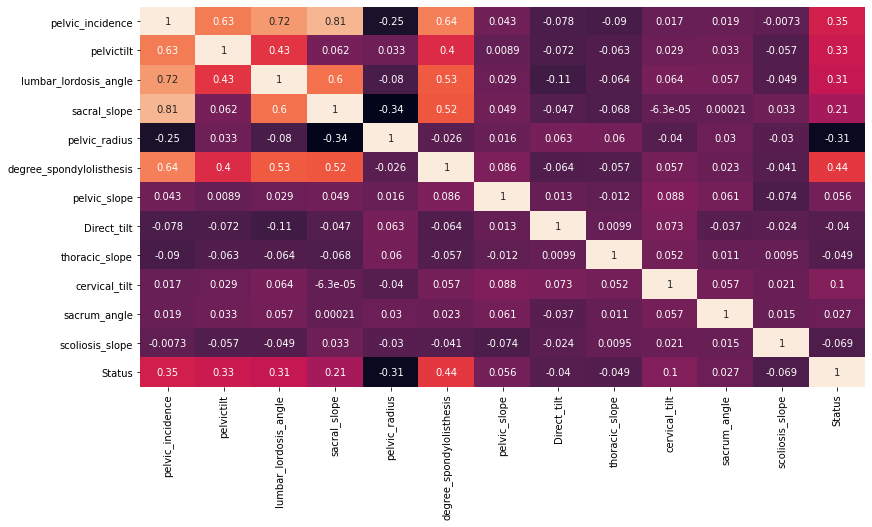

In [238]:
plt.figure(figsize=(13,7))
sns.heatmap(backpain_df.corr(),annot = True,cbar=False)

In [239]:
X = backpain_df.drop('Status',axis = 1)
y = backpain_df['Status']
Xc = sm.add_constant(X)
model = sm.Logit(y,Xc).fit()
model.summary()

         Current function value: 0.284109
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  310
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                           12
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.5482
Time:                        14:07:16   Log-Likelihood:                -88.074
converged:                      False   LL-Null:                       -194.93
Covariance Type:            nonrobust   LLR p-value:                 4.778e-39
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       15.1816      3.554      4.271      0.000       8.215      22.148
pelvic_incidence             4.6895   1.38e+05   3.41e-05      1.000    -2.7e+05     2.7e+05
pelvictilt                  -4.6083   1.38e+05  -3.35e-05      1.000    -2.7e+05     2.7e+05
lumbar_lordosis_angle       -0.0221      0.023     -0.948      0.343      -0.068       0.024
sacral_slope                -4.7842   1.38e+05  -3.48e-05      1.000    -2.7e+05     2.7e+05
pelvic_radius               -0.1054      0.023     -4.484      0.000      -0.151      -0.059
degree_spondylolisthesis     0.1709      0.024      7.196      0.000       0.124       0.217
pelvic_slope                -0.2188      0.688     -0.318      0.750      -1.567       1.130
Direct_tilt                  0.0137      0.023      0.587      0.557      -0.032       0.059
thoracic_slope              -0.0522      0.058     -0.902      0.367      -0.166       0.061
cervical_tilt                0.0496      0.066      0.747      0.455      -0.081       0.180
sacrum_angle                 0.0049      0.016      0.311      0.756      -0.026       0.036
scoliosis_slope             -0.0098      0.019     -0.527      0.598      -0.046       0.027
============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [240]:
backward_elimination(backpain_df,'Status')

         Current function value: 0.284109
         Iterations: 35
pelvictilt 0.9999732661799048
Optimization terminated successfully.
         Current function value: 0.284109
         Iterations 9
sacrum_angle 0.7561508115923491
Optimization terminated successfully.
         Current function value: 0.284265
         Iterations 9
pelvic_slope 0.7765062744532797
Optimization terminated successfully.
         Current function value: 0.284395
         Iterations 9
scoliosis_slope 0.6078216638197805
Optimization terminated successfully.
         Current function value: 0.284820
         Iterations 9
Direct_tilt 0.5088302706897315
Optimization terminated successfully.
         Current function value: 0.285529
         Iterations 9
cervical_tilt 0.4065543756139306
Optimization terminated successfully.
         Current function value: 0.286646
         Iterations 9
thoracic_slope 0.4633299601764963
Optimization terminated successfully.
         Current function value: 0.287518
         Iterat

['const',
 'pelvic_incidence',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

In [0]:
X_final = Xc[['pelvic_incidence',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']]
Y = y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_final,Y,test_size = 0.3,random_state = 0)

In [0]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [244]:
log_reg.coef_

array([[ 0.0543883 , -0.17636683, -0.12346274,  0.19020728]])

In [245]:
log_reg.intercept_

array([17.43144677])

In [246]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy * 100)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

82.79569892473118
[[25  5]
 [11 52]]


In [247]:
print('TPR/Sensitivity/Recall : ',52/63)
print('Using metrics : ',metrics.recall_score(y_test,y_pred))

TPR/Sensitivity/Recall :  0.8253968253968254
Using metrics :  0.8253968253968254


In [248]:
print('TNR/Specificity : ',25/30)

TNR/Specificity :  0.8333333333333334


# Overfitting vs Undefitting vs Ideal Model

![alt text](https://miro.medium.com/max/1000/1*i5BamDkqO1dnGxBVaTHtHw.png)

Model 1 : High training error and high testing error

Model 2 : Low training error and high testing error

Model 3 : Low training error and low testing error (Rightly fit model)

# For Classifiction Model

p = 1 / ( 1 + e^-(beta0 + beta1 * X) )

y = threshold(p)

Let,

z = beta0 + beta1 * X

y_prob = 1 / ( 1 + e^-(z) ) = e^z / ( 1 + e^z )

For interpretation of the above equation:

**p / (1 - p)** = e^z / ( 1 + e^z ) / 1 - (e^z / ( 1 + e^z )) = **e^z**

p / (1 - p) --> ODDS (prob of success / prob of failure)

log(ODDS) = log(p / (1 - p)) = log(e^z) = z --> beta0 + beta1 * X

In [249]:
np.exp(log_reg.coef_)

array([[1.05589453, 0.83831041, 0.88385458, 1.20950028]])

In [250]:
['pelvic_incidence',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

['pelvic_incidence',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

Every 1 unit increase in the pelvic incidence contributes to 5.58% increase in probablitiy of Abnormility.

Every 1 unit increase in the sacral slope contributes to 16.16% decrease in probablitiy of Abnormality.

Every 1 unit increase in the degree_spondylolisthesis contributes to 21% increase in probablitiy of Abnormility.

Every 1 unit increase in the pelvic radius contributes to 11.7% decrease in probablitiy of Abnormality.

## Cost function for Classification models

**Log loss :** 

The summation of log loss should be minimal.

Measure of uncertainity/ Entropy calculation

Entropy :

![alt text](https://www.saedsayad.com/images/Entropy_3.png)

**Cost function of Classification --> min( sum(log loss) )**

---

# ***Decision Trees***

![alt text](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/07/decision-tree.png)

In [0]:
df_dt = pd.DataFrame({'ID' : ['s1','s2','s3','s4','s5','s6','s7'],
                      'Salary ($1000)': [15,17,28,10,40,50,55],
                      'Age (yrs)': [28,25,30,35,38,32,40],
                      'Loan Defaulter' : [1,0,1,1,0,1,0]})

In [252]:
df_dt

,ID,Salary ($1000),Age (yrs),Loan Defaulter
0,s1,15,28,1
1,s2,17,25,0
2,s3,28,30,1
3,s4,10,35,1
4,s5,40,38,0
5,s6,50,32,1
6,s7,55,40,0


Assume the root node is a null model.

So y_pred = [1,1,1,1,1,1,1]

and y = [1,0,1,1,0,1,0]

p1 = 4/7 --> as 4 of then have been correctly classified.

p0 = 3/7 --> as 3 of then have been incorrectly classified.

Entropy = - [ ( (4/7) * log(4/7) ) + ( (3/7) * log(3/7) ) ] = 0.9857



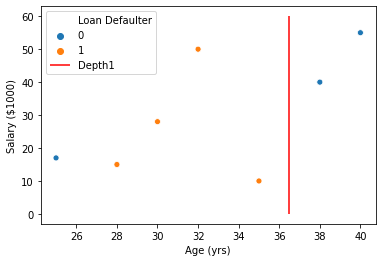

In [253]:
sns.scatterplot(df_dt['Age (yrs)'], df_dt['Salary ($1000)'], hue = df_dt['Loan Defaulter'])
plt.vlines(36.5,ymin = 0 , ymax = 60,label = 'Depth1',color = 'red')
plt.legend()

### Depth level 1

node1 -> { s1,s2,s3,s4,s6 } --> s2 misclassified {Still an impure node} 

**Entropy at node 1 :** 

p0 : 1/5 and p1 : 4/5

Entropy = - [ ( (4/5) * log(4/5) ) + ( (1/5) * log(1/5) ) ] = 0.7219

Assume we had got some entropy at node 2 as 0.315,

So summation of both entropies would be 1.0369 which is not expected. Our summation of the entropies of the nodes should be less than its root entropy. So we use **WEIGHTED ENTROPIES**.

*** Weighted Entropt of a node : entropy * (no. of points in current node/ no. of points in the root node) ***

Weighted Entropy for node 1 : 0.7219 * 5/7 = 0.5156

node2 -> { s5,s7 } --> no misclassification - {PURE Leaf} - Entropy/log loss is zero

So total entropy = 0.5156 + 0

Information gain = entropy(root node) - entropy(current node) = 0.9857 - 0.5156 = 0.4696

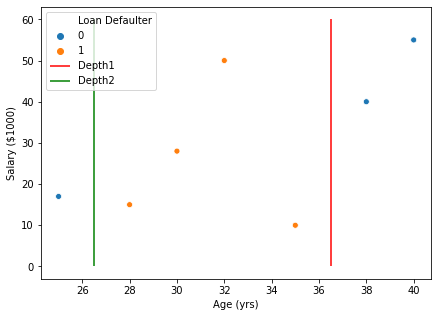

In [254]:
plt.figure(figsize = (7,5))
sns.scatterplot(df_dt['Age (yrs)'], df_dt['Salary ($1000)'], hue = df_dt['Loan Defaulter'])
plt.vlines(36.5,ymin = 0 , ymax = 60,label = 'Depth1',color = 'red')
plt.vlines(26.5,ymin = 0 , ymax = 60,label = 'Depth2',color = 'green')
plt.legend()

### Depth level 2

root_node -> { s1,s2,s3,s4,s6 }

node1 -> { s2 } --> no misclassification - {PURE Leaf} - Entropy/log loss is zero

node1 -> { s1,s3,s4,s6 } --> no misclassification - {PURE Leaf} - Entropy/log loss is zero

So total entropy = 0 + 0

Information gain = entropy(root node) - entropy(current node) = 0.5156 - 0 = 0.5156

**A fully grown decision tree is always overfit.**

### Decision Tree as a Regressor

In [0]:
df_dtr = pd.DataFrame({'ID' : ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'],
                       'Ht' : [152,180,167,175,142,172,160,172,165,167],
                       'Age' : [45,26,30,34,40,36,19,28,23,32],
                       'Wt' : [77,47,55,59,72,60,40,60,45,58]})

In [256]:
df_dtr

,ID,Ht,Age,Wt
0,s1,152,45,77
1,s2,180,26,47
2,s3,167,30,55
3,s4,175,34,59
4,s5,142,40,72
5,s6,172,36,60
6,s7,160,19,40
7,s8,172,28,60
8,s9,165,23,45
9,s10,167,32,58


Assume the root node is a null model.

So y_pred = ybar = [57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3]

and y = [77,47,55,59,72,60,40,60,45,58]

Cost function ---> MSE

MSE = 118.4

### Depth level 1 (Age > 35)

node1 -> { s2,s3,s4,s7,s8,s9,s10 }

ybar_node1 = 52

**MSE at node 1 :** 

MSE_node1 = 53.71

node2 -> { s1,s5,s6 }

ybar_node1 = 69.6

**MSE at node 2 :** 

MSE_node2 = 50.88

So total MSE = 53.71 + 50.88 = 104.5

Information gain = MSE(root node) - MSE(current node) = 118.4 - 104.5 = 13.9

### Depth level 2 (Height > 170)

node11 -> { s3,s7,s9,s10 }

ybar_node11 = 49.25

**MSE at node11 :** 

MSE_node11 = 53.25

node12 -> { s2,s4,s8 }

ybar_node12 = 55.3

**MSE at node12 :** 

MSE_node12 = 34.89

node21 -> { s1,s5 }

ybar_node21 = 74.5

**MSE at node21 :** 

MSE_node21 = 6.25

node22 -> { s6 }

ybar_node22 = 60

**MSE at node22 :** 

MSE_node22 = 0

So total MSE = 53.25 + 34.89 + 6.25 + 0 = 94.38

Information gain = MSE(root node) - MSE(current node) = 104.59 - 94.38 = 10.12

# Breast Cancer Dataset

In [0]:
df_bc = pd.read_csv('/content/gdrive/My Drive/data.csv')

In [0]:
df_bc.drop('Unnamed: 32',axis=1,inplace=True)

In [259]:
df_bc.shape

(569, 32)

In [260]:
df_bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [261]:
df_bc['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
df_bc.replace({'M':1,'B':0},inplace=True)

In [0]:
df_bc.drop('id',axis = 1,inplace=True)

In [264]:
df_bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [265]:
df_bc.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

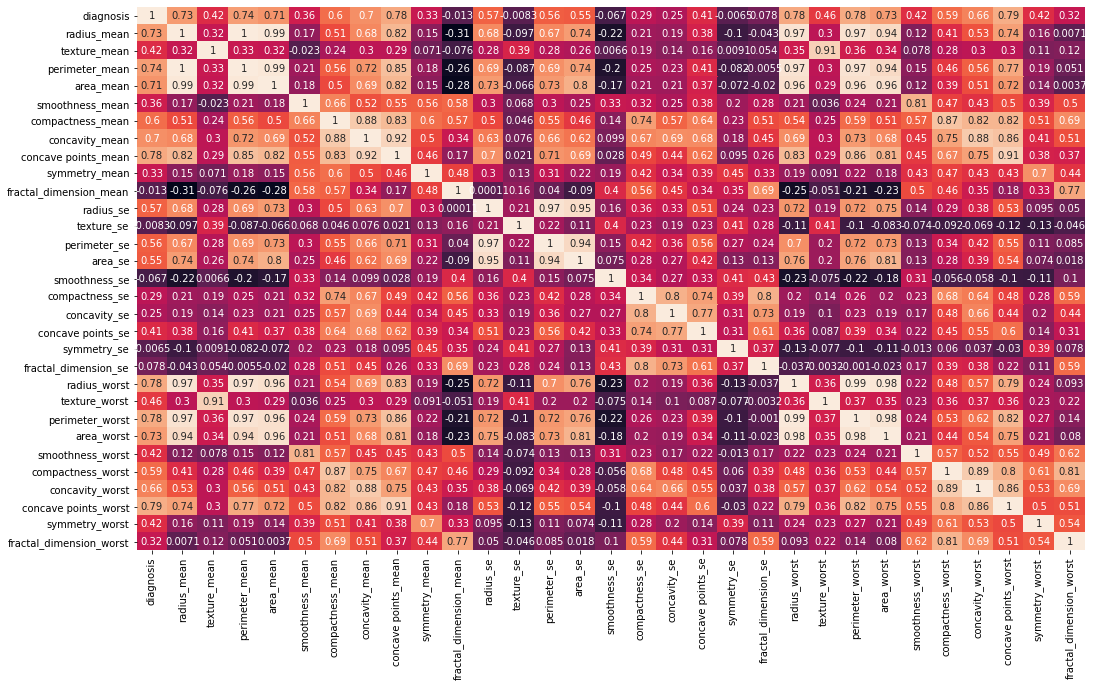

In [266]:
plt.figure(figsize=(17,10))
sns.heatmap(df_bc.corr(),annot = True,cbar=False)

In [0]:
X = df_bc.drop('diagnosis',axis =1)
y = df_bc['diagnosis']

### Gini Index for Decision Tree

**Gini Index:**

![alt text](https://miro.medium.com/max/415/0*asbVp_8lwEsbfpOv.png)           ---> pj : Probability of ith class.


## Why random state is used in decision tree model?
#### If a leaf node has multiple classes with equal probabilities for each class, there is a chance that different models will select different classes at leaf node for a test record. So to keep this selection of class uniform accross all models, we use random state.

# Reciever Operating Characteristics (ROC) curve

A graph between TPR and FPR : 

![alt text](https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png)

**For binary classification, ROC AUC curve is the best mertic.**

**For multiclass classification, weighted F1 score is the best mertic.**

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
LR = LogisticRegression()
DT = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
DT_reg = DecisionTreeClassifier(max_depth = 6,criterion = 'entropy',random_state = 0)
RF = RandomForestClassifier(n_estimators=10,random_state = 0)

In [0]:
models = []
models.append(('Logistic regression',LR))
models.append(('FullyGrownDecisionTree',DT))
models.append(('RegularizedDecisionTree',DT_reg))
models.append(('RandomForest',RF))

Logistic regression  :  0.9899944639901339  --  4.898208894588233e-05
FullyGrownDecisionTree  :  0.9251088647376843  --  0.0005942698820229264
RegularizedDecisionTree  :  0.9199137659454119  --  0.0004231416833342295
RandomForest  :  0.9887379464486961  --  0.00012604341427538177


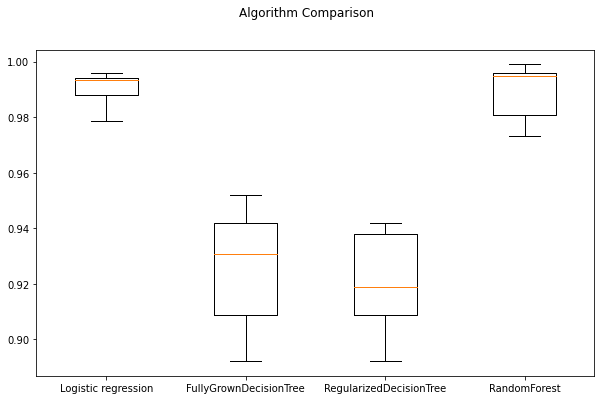

In [270]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits = 5,random_state = 0,shuffle = True)
  cv_results = cross_val_score(model,X,y,cv = kfold,scoring='roc_auc')
  results.append(cv_results)
  names.append(name)
  print(name,' : ',np.mean(cv_results),' -- ',np.var(cv_results,ddof = 1))

fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above boxplpot we can see that the Logistic regression has high mean roc auc score and low variance in roc auc score as compared to Fully grown decision tree.

Also with regularization of DT, we can see there is a mild improvement in the variance error as it has decreased as compared to fully grown decision tree.

For Random Forest we can see a big leap in improvement of the variance error.

In [271]:
results

[array([0.99396634, 0.99608262, 0.97871622, 0.98785166, 0.99335548]),
 array([0.93077167, 0.95192308, 0.89222973, 0.94181586, 0.90880399]),
 array([0.91886313, 0.93785613, 0.89222973, 0.94181586, 0.90880399]),
 array([0.99587171, 0.99501425, 0.97314189, 0.98065857, 0.99900332])]

In [272]:
DT.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
from IPython.display import Image
from os import system
from sklearn import tree

In [0]:
BC_Tree_File = open('bc_data.dot','w') # .dot --> Document Template File
dot_data = tree.export_graphviz(DT,out_file=BC_Tree_File,feature_names=list(X),class_names=['Benign','Malignant'])
BC_Tree_File.close()

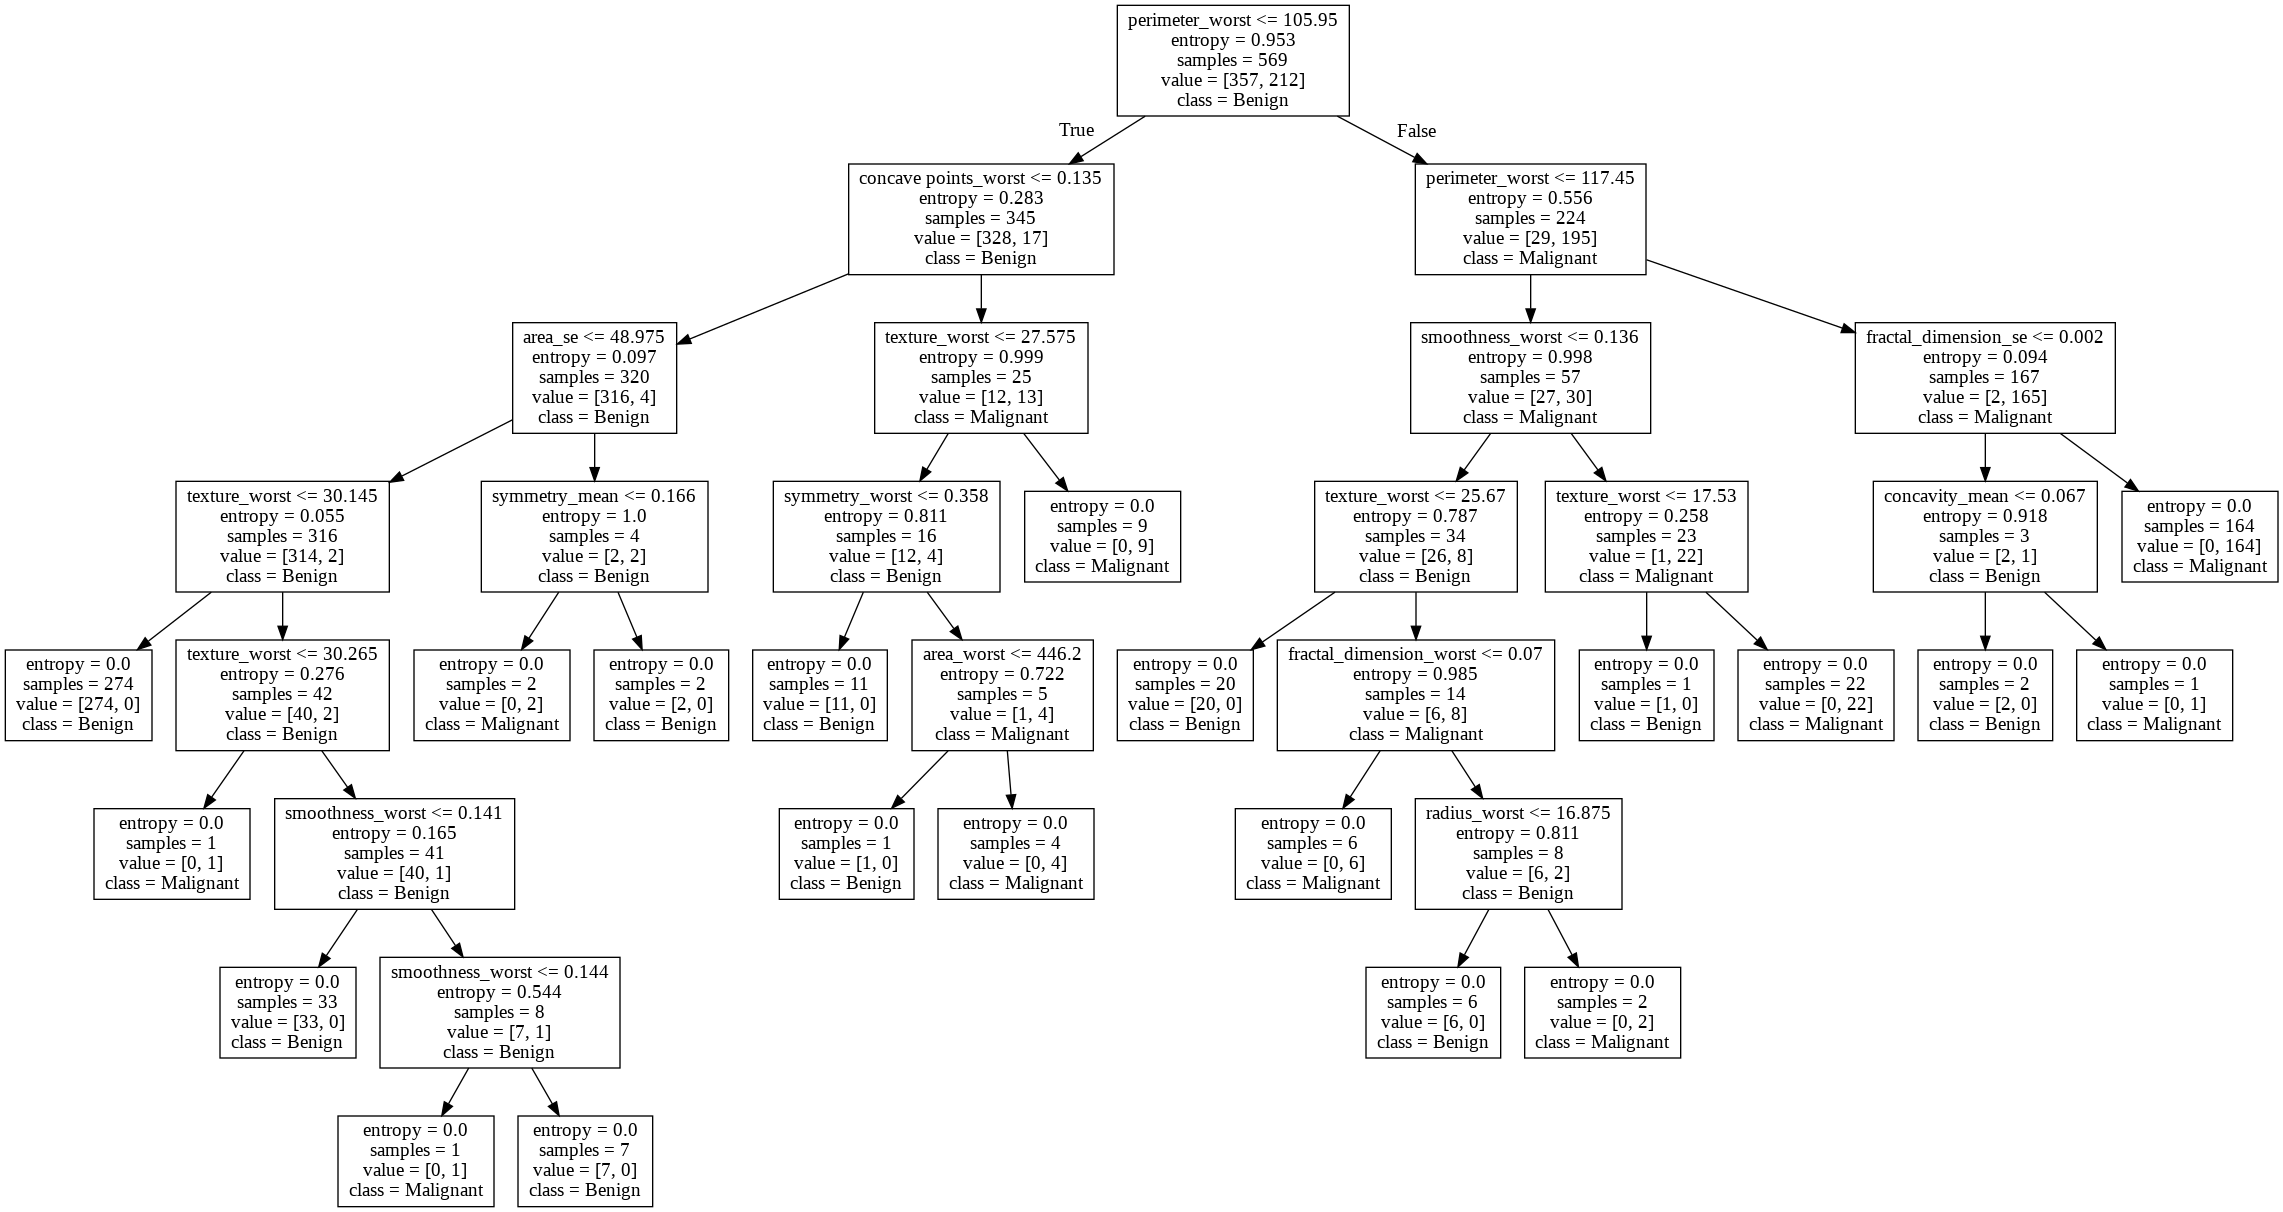

In [275]:
system('dot -Tpng bc_data.dot -o BC_Tree.png')
Image('BC_Tree.png')

Decision tree algorithms have different metric to find the decision splits. For example, CHAID uses Chi-Square test value, ID3 and C4.5 uses entropy, CART uses GINI Index.

### Feature Importance

In the below formula, the metric would correspond to which algorithm we are using. For eg, if the algo is CART, feature metric used would be GINI Index.

Feature importance (FI) = Feature metric * number of instances – its left child node metric * number of instances for the left child – its right child node metric * number of instances for the right child

Note that a feature can appear several times in a decision tree as a decision point. Sum of those individual decision points will be the feature importance of that feature.

We can normalize the feature importances if we divide them all with their sum.

In [276]:
pd.DataFrame(DT.feature_importances_,columns=['Normalized Feature Importance'],index = X.columns).sort_values(by = 'Normalized Feature Importance',ascending = False)

,Normalized Feature Importance
perimeter_worst,0.685889
concave points_worst,0.077020
texture_worst,0.076738
smoothness_worst,0.057138
fractal_dimension_se,0.023763
area_se,0.017597
symmetry_worst,0.017288
fractal_dimension_worst,0.013473
radius_worst,0.011973
symmetry_mean,0.007379


Because of its greedy nature, Decision Tree does not use all the features due to which it is by default a highly biased model.

So Fully Grown Decision Tree is the only model which is simultaneously susceptible to bias as well as variance error.

Regularization/Pruning will only reduce the variance error to a certain extent for Decision Trees but will affect to a more extent towards the bias error.

So to reduce the variance error of Decision Tree we use Random Forest.

#### Entropy : 
For binary classification, entropy will be between 0 and 1.

For multiclass classification, entropy can exceed 1.

#### Gini : 
For binary classification, gini will be between 0 and 0.5.

For multiclass classification, gini can exceed 0.5.


**Decision tree and Random forest are non parametric models whereas Linear and Logistic regression are parametric models.**

**For parametric models, we need to make sure we follow all the assumptions.**

# Precision and Recall
### **Example**
![alt text](https://i.ibb.co/HghSf5G/conf-mat.png)

#### Sensitivity/Recall : The fraction of ***total amount of relevent instances*** that were ***actually retrieved***.

Recall_Dog = 25/25 = 1

Recall_Cat = 16/20 = 0.8

Recall_Rabbit = 12/17 = 0.70588

#### Precision : The fraction of ***relevent instances*** among ***retrieved instances***.

Precision_Dog = 25/25 = 1

Precision_Cat = 16/21 = 0.7619

Precision_Rabbit = 12/16 = 0.75

#### F1 score : ***Harmonic mean*** of precision and recall (2ab/a+b)

F1_Dog = 1

F1_Cat = 0.78

F1_Rabbit = 0.72

---

# ***Random Forest (Bagged Decision Trees)***

![alt text](https://i.ibb.co/3SzFxzc/random-forest.png)

Random forest is the only model which has built-in ensemble characteristics. 

**Bootstarp Sampling** : Random sampling with replacement. Using bootstrap sampling we try to reduce the variance of the data.

![alt text](https://i.stack.imgur.com/5Nzqf.png)

In random forest we use multiple bootstrapped samples and create multiple decision trees(weak learners/less complex models) to build a strong model.

**It finally chooses the class which has been classified by majority of the weak learners.**

**Random forest handles the bias error** by using a strategy to pick only sqrt of total number of features in each decision tree, but these features are picked randomly, hence all the features get an opprtunity to be picked in some or the other weak learner. This way it utilizes all the features in different weak learners so the bias error is reduced in such a way.

## Two perspectives for Random forest :
1. Random forest has less bias error as compared to fully grown decision tree.
2. Random forest has higher bias error as compared to other bagging models(eg : bagging model of logistic regression will use all features for sampling but RF uses sqrt of total number of features.)

# Characteristics : 
1. Linear Regression, Logistic Regression, Naive Bias : High bias error but low variance error.
2. KNN with high n_neighbors : High bias error but low variance error.
3. KNN with low n_neighbors : Low bias error but high variance error.
4. Fully Grown Decision Tree : High bias error and high variance error.
5. Random Forest : Moderate bias error but low variance error.
6. Other Bagged models : Low bias error and low variance error.
---

# ***K Nearest Neighbor (KNN)***

![alt text](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/03/How-does-KNN-Algorithm-work-KNN-Algorithm-In-R-Edureka-528x250.png)

**Laziest Algorithm** : Because it does not calculate any model parameters till the time a new test data comes.

In [0]:
  df_knn = pd.DataFrame({'ID' : ['s1','s2','s3','s4'],
                       'Age' : [25,30,50,45],
                       'Wt' : [40,42,60,62],
                       'Class' : ['Young','Young','Middle','Middle']})

In [278]:
df_knn

,ID,Age,Wt,Class
0,s1,25,40,Young
1,s2,30,42,Young
2,s3,50,60,Middle
3,s4,45,62,Middle


### **Euclidean distances :** 

ed_s1_s2 = np.sqrt( (25-30)^2 + (40-42)^2 ) = 5.38

ed_s1_s3 = np.sqrt( (25-50)^2 + (40-60)^2 ) = 32.01

ed_s3_s4 = np.sqrt( (50-45)^2 + (60-62)^2 ) = 5.38

### **Manhattan distances :** 

md_s1_s2 = np.abs(25-30)^2 + np.abs(40-42)^2 = 7

md_s1_s3 = np.abs(25-50)^2 + np.abs(40-60)^2 = 45

md_s3_s4 = np.abs(50-45) + np.abs(60-62)^2 = 7

### **Cosine distances :** 
#### ***Cosine distance = 1 - Cosine_Similarity***
![alt text](https://neo4j.com/docs/graph-algorithms/current/images/cosine-similarity.png)

cd_s1_s2 = 1 - [ ( (25x30)+(40x42) ) / ( np.sqrt(25^2 + 40^2) x np.sqrt(30^2 + 42^2) ) ] = 1 - 0.998 = 0.0018

cd_s1_s3 = 1 - [ ( (25x50)+(40x60) ) / ( np.sqrt(25^2 + 40^2) x np.sqrt(50^2 + 60^2) ) ] = 1 - 0.990 = 0.0092

cd_s3_s4 = 1 - [ ( (50x45)+(60x62) ) / ( np.sqrt(50^2 + 60^2) x np.sqrt(45^2 + 62^2) ) ] = 1 - 0.997 = 0.0022

In [279]:
df_knn['age_scaled'] = (df_knn['Age'] - np.mean(df_knn['Age']))/np.std(df_knn['Age'],ddof=1)
df_knn['wt_scaled'] = (df_knn['Wt'] - np.mean(df_knn['Wt']))/np.std(df_knn['Wt'],ddof=1)
df_knn

,ID,Age,Wt,Class,age_scaled,wt_scaled
0,s1,25,40,Young,-1.050210,-0.947900
1,s2,30,42,Young,-0.630126,-0.775555
2,s3,50,60,Middle,1.050210,0.775555
3,s4,45,62,Middle,0.630126,0.947900


## Distance calculation on scaled data
### **Euclidean distances :** 

ed_s1_s2 = 0.45

ed_s1_s3 = 2.71

ed_s3_s4 = 0.453

### **Manhattan distances :** 

md_s1_s2 = 0.592

md_s1_s3 = 3.82

md_s3_s4 = 0.59

### **Cosine distances :** 

cd_s1_s2 = 0.011

cd_s1_s3 = 1.99

cd_s3_s4 = 0.052

***Test Data***

test_age = 28
test_wt = 45

scaled_test_age = -0.798
scaled_test_wt = -0.517

Euclidean Distance of test data from all the training points : 

ed_test_s1 = 0.5

ed_test_s2 = 0.308

ed_test_s3 = 2.25

ed_test_s4 = 2.03

Lets assume n_neighbors = 3

So the nearest neighbors will be, s2,s1 and s4 and are classified as Young, Young and Middle respectively. So as the majority of these classes is Young, our test data will be classified as **YOUNG**. This is called *unweighted/uniform/majority voting*.

***Weighted/Inverse Distance Voting***

![alt text](https://i.ibb.co/kDnfVzg/weighted-voting.png)

Closer neighbors get higher votes. Take a neighbor's vote to be inverse of its distance to the new instance. Then we sum the votes and return the class with highest votes.

vote(x) = 1/ distance(x,ith training data)

So the above green point will be classified to blue class.

# How change in value of k affects the model?

![alt text](https://i.ibb.co/D5yyTGM/effect-of-varing-k.png)

Lower the value of k/n_neighbor, the model will overfit.

Higher the value of k/n_neighbor, the model will underfit.

A weighted model will be equivalent to an unweighted overfit model as it is predicted to class similar to the class of the closest point in training set.

So its better always a good practice to build a base model with 'distance' metric so that we get a model with high variance error and low bias error. We can then further deal with the high variance error by using bagging.

In [280]:
backpain_df.columns

Index(['pelvic_incidence', 'pelvictilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Status'],
      dtype='object')

In [0]:
data = backpain_df.iloc[:,[0,1,2,3,4,5,12]]

In [282]:
data.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [0]:
from scipy.stats import ttest_ind
df0  = data[data['Status'] == 0]
df1  = data[data['Status'] == 1]

In [284]:
for col in data.columns[:-1]:
  print(col," : ",ttest_ind(df0[col],df1[col]))

pelvic_incidence  :  Ttest_indResult(statistic=-6.6285856350132955, pvalue=1.516337137438054e-10)
pelvictilt  :  Ttest_indResult(statistic=-6.053206646787071, pvalue=4.122674154069914e-09)
lumbar_lordosis_angle  :  Ttest_indResult(statistic=-5.773180434184712, pvalue=1.898448510588465e-08)
sacral_slope  :  Ttest_indResult(statistic=-3.7808470712114293, pvalue=0.00018769555657203096)
pelvic_radius  :  Ttest_indResult(statistic=5.71945225076399, pvalue=2.5290220394265647e-08)
degree_spondylolisthesis  :  Ttest_indResult(statistic=-8.688731198808457, pvalue=2.2012863107202555e-16)


In [0]:
X = data.drop('Status',axis = 1)
y = data['Status']

In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [287]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
params = {
    'n_neighbors' : np.arange(1,50),
    'weights' : ['uniform','distance']
}
param_dt = {
    'criterion' : ['entropy','gini']
}
param_rf = {
    'n_estimators' : np.arange(1,50)
}
gscv = GridSearchCV(knn,params,scoring='roc_auc',cv = 3)
gscv_dt = GridSearchCV(dt,param_dt,scoring='roc_auc',cv = 3)
gscv_rf = GridSearchCV(rf,param_rf,scoring='roc_auc',cv = 3)
gscv.fit(X,y)
gscv_dt.fit(X,y)
gscv_rf.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [288]:
print(gscv.best_params_)
print(gscv_dt.best_params_)
print(gscv_rf.best_params_)

{'n_neighbors': 14, 'weights': 'distance'}
{'criterion': 'gini'}
{'n_estimators': 35}


In [0]:
knn_final = KNeighborsClassifier(**gscv.best_params_)
LR = LogisticRegression()
dt_final = DecisionTreeClassifier(criterion='gini',random_state=0)
rf_final = RandomForestClassifier(n_estimators=35,random_state=0)
models = []
models.append(('KNNClassifier',knn_final))
models.append(('Logistic Regression',LR))
models.append(('DecisionTree',dt_final))
models.append(('Random Forest',rf_final))

KNNClassifier  :  0.8918524888091385  --  0.0007121838265745402
Logistic Regression  :  0.9316442176238775  --  0.0003621807050477432
DecisionTree  :  0.8062486290641785  --  0.00790071469284785
Random Forest  :  0.9073436054046548  --  0.0016871844134126847


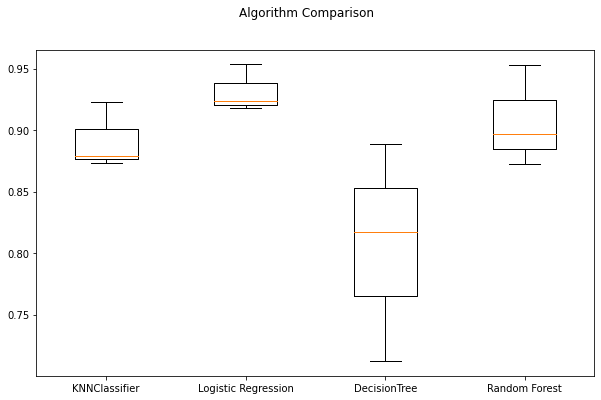

In [290]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits = 3,random_state = 0,shuffle = True)
  cv_results = cross_val_score(model,X,y,cv = kfold,scoring='roc_auc')
  results.append(cv_results)
  names.append(name)
  print(name,' : ',np.mean(cv_results),' -- ',np.var(cv_results,ddof = 1))

fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### **IMPORTANT NOTE :**

1. The role of bagging is to reduce the variance error.
2. The role of boosting is to reduce the bias error. GridSearch CV will always try to reduce the Bias error. So we need to tune the variance error manually.
---

# ***Naive Bayes***

In [0]:
df_iris = pd.read_csv('/content/gdrive/My Drive/iris.csv')

In [0]:
iris = df_iris.drop(['sepal_length','sepal_width'],axis = 1)

In [293]:
iris.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


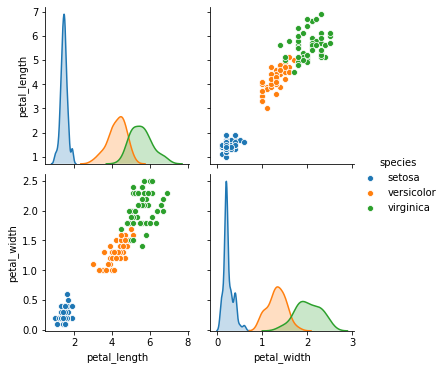

In [294]:
sns.pairplot(iris,hue='species')

We can see from the pairplot that setosa is clearly separable, but there is some amount of overlapping between versicolor and virginica for both the features.

## Intuition

**Gaussian Distribution (P) Formula :** 

![alt text](https://cdn-5a6cb102f911c811e474f1cd.closte.com/wp-content/uploads/2017/11/Normal-Distribution-Probability-Density-Function.png)

**Prior Probability of a class = Number of records belonging to that class/ Total number of records**

*Probability that a new test data belongs to a class is given by*:

P(TestPetalLength,TestPetalWidth|setosa) = P(TestPetalLength|setosa) x P(TestPetalWidth|setosa) x PriorProbability(setosa)

P(TestPetalLength,TestPetalWidth|versicolor) = P(TestPetalLength|versicolor) x P(TestPetalWidth|versicolor) x PriorProbability(versicolor)

P(TestPetalLength,TestPetalWidth|virginica) = P(TestPetalLength|virginica) x P(TestPetalWidth|virginica) x PriorProbability(virginica)

In [0]:
def gaussianProbabilityDistribution(x,mean,std):
  exponent = np.exp(-((x-mean)**2/(2*std**2)))
  return exponent / (np.sqrt(2 * np.pi) * std)

In [296]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [0]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(iris.iloc[:,:-1]),columns=['x1','x2'])
X['labels'] = iris['species']

In [0]:
iris_setosa = X[X['labels'] == 'setosa']
iris_versicolor = X[X['labels'] == 'versicolor']
iris_virginica = X[X['labels'] == 'virginica']

In [0]:
# Test Samples
test1 = [0.53529,0.5276]
test2 = [-1.398,-1.3129]
test3 = [1.047,1.185]

In [300]:
prob_setosa = gaussianProbabilityDistribution(test1[0],iris_setosa['x1'].mean(),np.std(iris_setosa['x1'],ddof = 1)) * gaussianProbabilityDistribution(test1[1],iris_setosa['x2'].mean(),np.std(iris_setosa['x2'],ddof = 1)) * (1/3)
prob_versicolor = gaussianProbabilityDistribution(test1[0],iris_versicolor['x1'].mean(),np.std(iris_versicolor['x1'],ddof = 1)) * gaussianProbabilityDistribution(test1[1],iris_versicolor['x2'].mean(),np.std(iris_versicolor['x2'],ddof = 1)) * (1/3)
prob_virginica = gaussianProbabilityDistribution(test1[0],iris_virginica['x1'].mean(),np.std(iris_virginica['x1'],ddof = 1)) * gaussianProbabilityDistribution(test1[1],iris_virginica['x2'].mean(),np.std(iris_virginica['x2'],ddof = 1)) * (1/3)
print(prob_setosa,prob_versicolor,prob_virginica)
print(np.argmax([prob_setosa,prob_versicolor,prob_virginica]))

2.0701801575788473e-110 0.18867914757093562 0.04269273681047853
1


The test1 sample will be classified as VERSICOLOR.

In [301]:
prob_setosa = gaussianProbabilityDistribution(test2[0],iris_setosa['x1'].mean(),np.std(iris_setosa['x1'],ddof = 1)) * gaussianProbabilityDistribution(test2[1],iris_setosa['x2'].mean(),np.std(iris_setosa['x2'],ddof = 1)) * (1/3)
prob_versicolor = gaussianProbabilityDistribution(test2[0],iris_versicolor['x1'].mean(),np.std(iris_versicolor['x1'],ddof = 1)) * gaussianProbabilityDistribution(test2[1],iris_versicolor['x2'].mean(),np.std(iris_versicolor['x2'],ddof = 1)) * (1/3)
prob_virginica = gaussianProbabilityDistribution(test2[0],iris_virginica['x1'].mean(),np.std(iris_virginica['x1'],ddof = 1)) * gaussianProbabilityDistribution(test2[1],iris_virginica['x2'].mean(),np.std(iris_virginica['x2'],ddof = 1)) * (1/3)
print(prob_setosa,prob_versicolor,prob_virginica)
print(np.argmax([prob_setosa,prob_versicolor,prob_virginica]))

2.2467417323079815 1.6934743556696989e-16 1.5305316043277082e-23
0


The test2 sample will be classified as SETOSA.

In [302]:
prob_setosa = gaussianProbabilityDistribution(test3[0],iris_setosa['x1'].mean(),np.std(iris_setosa['x1'],ddof = 1)) * gaussianProbabilityDistribution(test3[1],iris_setosa['x2'].mean(),np.std(iris_setosa['x2'],ddof = 1)) * (1/3)
prob_versicolor = gaussianProbabilityDistribution(test3[0],iris_versicolor['x1'].mean(),np.std(iris_versicolor['x1'],ddof = 1)) * gaussianProbabilityDistribution(test3[1],iris_versicolor['x2'].mean(),np.std(iris_versicolor['x2'],ddof = 1)) * (1/3)
prob_virginica = gaussianProbabilityDistribution(test3[0],iris_virginica['x1'].mean(),np.std(iris_virginica['x1'],ddof = 1)) * gaussianProbabilityDistribution(test3[1],iris_virginica['x2'].mean(),np.std(iris_virginica['x2'],ddof = 1)) * (1/3)
print(prob_setosa,prob_versicolor,prob_virginica)
print(np.argmax([prob_setosa,prob_versicolor,prob_virginica]))

1.3403125213963518e-188 6.18083016849452e-06 0.4497626737949879
2


The test3 sample will be classified as VIRGINICA.

## **NOTE:**
A general thumbrule for scaling - 

1. Use "StandardScalar" when majority of our data is continous.
2. Use "MinMaxScalar" when majority of our data is categorical or there are a 50% continous and 50% categorical variables.
3. "MaxNormalization" is generally used to scale pixel of image data (Convert from 0-255 grayscale to 0-1 scale)

### WHY WE NEED TO PERFORM STATISTICAL TEST BEFORE SCALING THE DATA?
After using Standard Scalar all the features will have a mean of zero. So there will be no Hypothesis Testing possible.

# Bagging and Boosting

In [303]:
df2

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [304]:
backward_elimination(df2,'TenYearCHD')

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
diabetes 0.9012045780435511
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
currentSmoker 0.64836503909236
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
BMI 0.6296050439469527
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
diaBP 0.5625804781393751
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
BPMeds 0.4697715086532108
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
heartRate 0.41602841295529747
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
education 0.3066346175601081
Optimization terminated successfully.
         Current function value: 0.376914
         Itera

['const', 'Gender', 'age', 'cigsPerDay', 'sysBP', 'glucose']

In [0]:
X_parametric_model = df2[['Gender', 'age', 'cigsPerDay', 'sysBP', 'glucose']]
X_all = df2.drop('TenYearCHD',axis = 1)
y = df2['TenYearCHD']

### NOTE : 
Linear/parametric models works very well if we go through the statistics strictly and we should use the selected features. For non paraetric models, we need not go through the feature selection and statistics.

In [0]:
ss = StandardScaler()
X_parametric_model_scaled = ss.fit_transform(X_parametric_model)
X_all_scaled = ss.fit_transform(X_all)

In [312]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {
    'n_neighbors' : np.arange(1,100),
    'weights' : ['uniform','distance']
}
gscv = GridSearchCV(knn,params,scoring='roc_auc',cv = 15)
gscv.fit(X_all_scaled,y)
print(gscv.best_params_)

{'n_neighbors': 97, 'weights': 'distance'}


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
LR = LogisticRegression()
NB = GaussianNB()
knn = KNeighborsClassifier(**gscv.best_params_)

In [0]:
models = []
models.append(('Logistic Regression',LR))
models.append(('NaiveBayes',NB))
models.append(('KNN',knn))

#### Using important features

Logistic Regression  :  0.7310217888597249  --  0.0026756397651047934
NaiveBayes  :  0.7244837114932297  --  0.0027830492357967334
KNN  :  0.7228842647696422  --  0.0029974543131819726


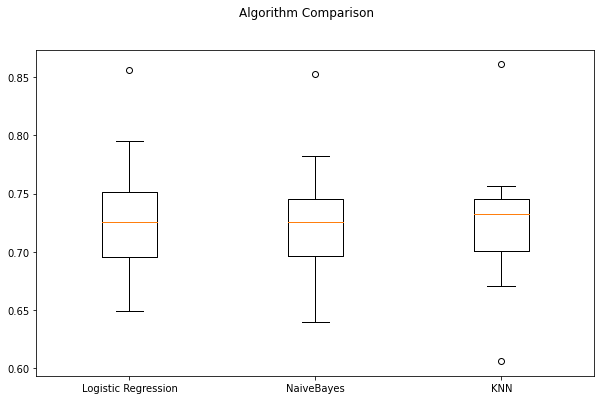

In [315]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits = 15,random_state = 0,shuffle = True)
  cv_results = cross_val_score(model,X_parametric_model_scaled,y,cv = kfold,scoring='roc_auc')
  results.append(cv_results)
  names.append(name)
  print(name,' : ',np.mean(cv_results),' -- ',np.var(cv_results,ddof = 1))

fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Using All Features

Logistic Regression  :  0.7303663899700915  --  0.0023387080200214
NaiveBayes  :  0.7139664929382767  --  0.002759069144959123
KNN  :  0.7054959646902937  --  0.0020241966283273153


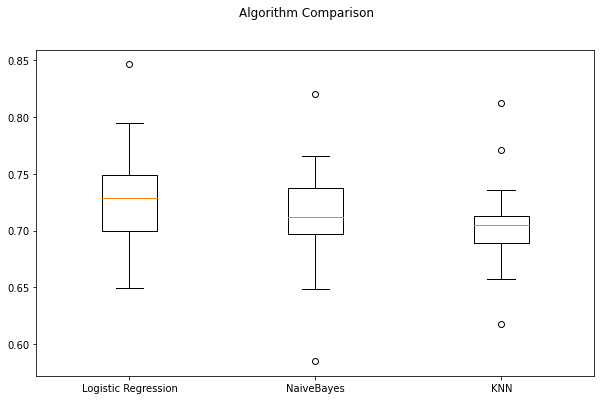

In [316]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits = 15,random_state = 0,shuffle = True)
  cv_results = cross_val_score(model,X_all_scaled,y,cv = kfold,scoring='roc_auc')
  results.append(cv_results)
  names.append(name)
  print(name,' : ',np.mean(cv_results),' -- ',np.var(cv_results,ddof = 1))

fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Best way to select number of splits in kfold cross validation
Select that n_splits value for which there is not much change in the variance error even if we change the random state.

## Bagging
![alt text](https://i.ibb.co/2Kg3SRk/bagging.png)

Its similar to Random Forest but the only difference is that the Bagging ensemble techinque can use any estimator and we can use all the features in Bagging as opposed to sqrt(n) features in Random forest in bootstrap samples.

In Bagging classifier as well as bagging regressor, **the learning(training) as well as prediction(testing) happens in parallel** as no weak learners are dependent on each other.

For Bagging classifier, we use voting to get the final result from weak learners whereas in Bagging regressor we get the mean of all the results from weak learners.

We cannot bag a random forest model as it is already by default a bagging model.

## Boosting
#### AdaBoost (Adaptive Boosting)

![alt text](https://miro.medium.com/max/850/0*KYszvMnr3nCtjaGy.png)

**Learning happens serially but prediction happens parallely.**

Consider 10 records which are input to the 1st weak learner. So the probability of each record being picked by the 1st learner will be the same(0.1). Assume the 1st weak learner after training misclassifies 2 records and the others are classified correctly. Now for these 2 misclassified records, the probability of getting selected by the 2nd weak learner will be increased by a some margin. So to balance the effect, the probability of other records will by decreased by some margin. Now as the probability of misclassified records is higher, those records will definitely be picked up by the 2nd weak learner. So the 2nd weak learner will pick the difficult records from the learner 1 and some other records. This way again the 2nd weak learner will follow the same process as 1st and most of the difficult records will have to be handled by the tail-end weak learners gradually.

We cannot use KNN for boosting as there is not training involved in KNN model. It directly gets test data and checks how close it is to a training record.

In Boosting, the prediction happens parallely but each estimator is weighted upon how many of the difficult records are being handled by it. So higher the handling of difficult records, greater will be the weight of those estimators. 

For Adaboost classifier, the weight of those estimators classifying the test record to the same class is summed up. So the class which has a higher sum of weights will be considered as the final prediction for that test record.

For Adaboost regressor, we take the weighted average of the predicted values of the estimators and predict it as output for the test record.